In [1]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from datetime import datetime

In [71]:
city = pd.read_csv("zip_code_city.csv")

In [32]:
station = pd.read_csv("station.csv")

In [91]:
#Archivo de duracion de los viajes
trips=pd.read_csv("trip.csv")
#trips=trips_all.loc[trips_all.start_date.str.contains('4/'+'\S'+'/2014')]
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [92]:
#trips[trips['start_day']== datetime(2014,4,9)]
#trips.sort_values('start_date')

In [93]:
,#Archivo de clima
weather=pd.read_csv("weather.csv")
#weather = weather_all.loc[weather_all.date.str.contains('4/'+'\S'+'/2014')]
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [94]:
weather[weather['date']=='4/1/2014'] #hay varias temperaturas para un dia, depende del zip_code que tmb esta en trips

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
951,4/1/2014,58.0,52.0,46.0,47.0,43.0,41.0,82.0,72.0,61.0,...,9.0,2.0,30.0,13.0,36.0,0.69,7.0,Rain,158.0,94107
1135,4/1/2014,57.0,50.0,44.0,46.0,43.0,39.0,100.0,86.0,51.0,...,10.0,4.0,15.0,7.0,21.0,0,5.0,Rain,162.0,94063
1319,4/1/2014,59.0,52.0,46.0,48.0,44.0,43.0,93.0,76.0,55.0,...,12.0,6.0,17.0,10.0,NaN,0,7.0,Rain,167.0,94301
1503,4/1/2014,60.0,53.0,45.0,45.0,43.0,41.0,92.0,74.0,55.0,...,10.0,4.0,20.0,8.0,24.0,0.36,5.0,Rain,148.0,94041
1687,4/1/2014,57.0,50.0,43.0,46.0,43.0,38.0,100.0,80.0,59.0,...,10.0,6.0,23.0,10.0,32.0,0.29,6.0,Rain,128.0,95113


In [95]:
#dia-temperatura-duracion
trips_reducido = trips[['start_date','duration','start_station_id']]
weather_reducido = weather[['date','mean_temperature_f','zip_code']]

In [96]:
trips_reducido['start_date']=trips_reducido.start_date.map(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M') )
weather_reducido['date']=weather_reducido.date.map(lambda x: datetime.strptime(x, '%m/%d/%Y') )

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [97]:
#trips_reducido['temperature']=weather_reducido[trips_reducido['start_date'],'mean_temperatura_f'] #EN REALIDAD TRIPS_REDUCIDO NO SE GUARDA EN EL ORDEN QUE QUIERO, ENTONCES NO PUEDO HACER ESTO
#datos.ix[['cam01', 'tur03', 'pet05'], 'peso']

##trips_reducido['duration'].corr(trips_reducido['start_date'])
#weather_reducido.corr()
#datos['tamano'].corr(datos['peso'])

#dt=datetime.strptime('4/9/2014 23:33', '%m/%d/%Y %H:%M')

trips_reducido['start_day']=trips_reducido.start_date.map(lambda x: x.date() ) #para ponerlo igual que en weather

weather_reducido['start_day']=weather_reducido.date.map(lambda x: x.date() )

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [98]:
trips_reducido.head()

,start_date,duration,start_station_id,start_day
0,2013-08-29 14:13:00,63,66,2013-08-29
1,2013-08-29 14:42:00,70,10,2013-08-29
2,2013-08-29 10:16:00,71,27,2013-08-29
3,2013-08-29 11:29:00,77,10,2013-08-29
4,2013-08-29 12:02:00,83,66,2013-08-29


In [99]:
weather_reducido.head()

,date,mean_temperature_f,zip_code,start_day
0,2013-08-29,68.0,94107,2013-08-29
1,2013-08-30,69.0,94107,2013-08-30
2,2013-08-31,64.0,94107,2013-08-31
3,2013-09-01,66.0,94107,2013-09-01
4,2013-09-02,69.0,94107,2013-09-02


In [100]:
weather_reducido['zip_code'].values

array([94107, 94107, 94107, ..., 95113, 95113, 95113])

In [101]:
#trips_reducido['zip_code'].map(lambda x: if x!=null: int(x))

In [102]:
#trips_reducido['zip_code'].isnull().count()

In [103]:
weather_reducido2=pd.merge( weather_reducido[['start_day','zip_code','mean_temperature_f']], city,on=['zip_code'],how='inner')

In [104]:
weather_reducido2.head()

,start_day,zip_code,mean_temperature_f,city
0,2013-08-29,94107,68.0,San Francisco
1,2013-08-30,94107,69.0,San Francisco
2,2013-08-31,94107,64.0,San Francisco
3,2013-09-01,94107,66.0,San Francisco
4,2013-09-02,94107,69.0,San Francisco


In [105]:
trips_reducido2=pd.merge( station[['id','city']], trips_reducido,left_on = ['id'], right_on = ['start_station_id'])

In [106]:
trips_reducido2.head()

,id,city,start_date,duration,start_station_id,start_day
0,2,San Jose,2013-08-29 19:18:00,454,2,2013-08-29
1,2,San Jose,2013-08-29 17:33:00,523,2,2013-08-29
2,2,San Jose,2013-08-29 19:57:00,841,2,2013-08-29
3,2,San Jose,2013-08-29 20:36:00,994,2,2013-08-29
4,2,San Jose,2013-08-29 13:52:00,1580,2,2013-08-29


In [107]:
temp_duration=pd.merge( weather_reducido2[['start_day','mean_temperature_f','city']], trips_reducido2[['duration','start_day','city']],on=['start_day','city'],how='inner')

In [108]:
temp_duration.head()

,start_day,mean_temperature_f,city,duration
0,2013-08-29,68.0,San Francisco,134
1,2013-08-29,68.0,San Francisco,188
2,2013-08-29,68.0,San Francisco,242
3,2013-08-29,68.0,San Francisco,320
4,2013-08-29,68.0,San Francisco,423


In [109]:
#temp_duration.sort_values('start_day',ascending=False)


In [110]:
#temp_duration.dropna(how='any')

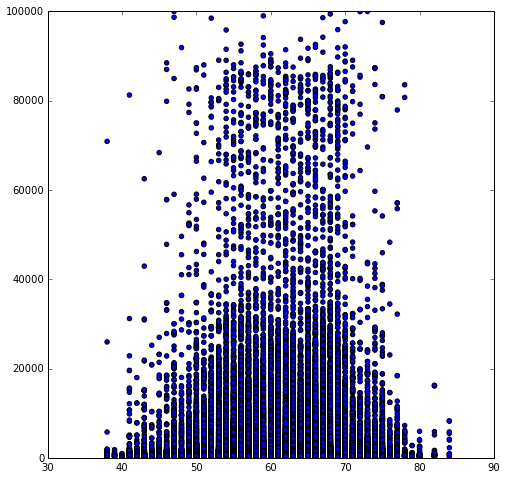

In [114]:
%matplotlib inline
plot.figure(figsize=(8,8))
#plot.xlim(48,74)
plot.ylim(-.5,100000)
plot.scatter(temp_duration['mean_temperature_f'], temp_duration['duration'])